# Gradient Boosting Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Column 'Pclass' shows Passenger Class.
# column 'SibSp' shows no. of Siblings and Spouse.
# Column 'Parch' shows no. of PARENTS AND childrens.
# Column 'Ticket' shows Ticket no.
# Column 'Fare' gives Amount spend for tickets.
# Column 'Cabin' shows Cabin no.
# Here 'embarked' column cointains initials of city names from where passesgers started their journey.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
s= df.isna().sum()

In [8]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Here CAbin column have 687 null values but this column is importatnt for predicting survival
# so can not drop this column so we fill 'Constatnt --> unknown' 
# Here Age column have 177 null values and we can fill tht values by 'mean' or 'median'


### Seperating X and Y

In [10]:
x= df.drop(columns=['PassengerId', 'Name','Ticket','Survived'],axis=1)
y= df[['Survived']]
# Here Column 'Passenger id, Name, ticket ' are not importatnt to predict no. of survived people.
# so we have droped these columns.

In [11]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Seperate categorical and contineous features

In [13]:
cat= list(x.columns[x.dtypes=='object'])
con = x.columns[x.dtypes!='object']

In [14]:
cat

['Sex', 'Cabin', 'Embarked']

In [15]:
cat1= ['Cabin']
cat1

['Cabin']

In [16]:
cat2 = ['Sex','Embarked']
cat2

['Sex', 'Embarked']

In [17]:
con

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Pipeline for X Preprocessing 

In [18]:
# here pipeline for column 'Cabin' is to be created seperately 
# to fill null values as 'unknown'


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
# Pipeline foe numeric colums
num_pipe= Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                          ('Scaler',StandardScaler())])

# Pipeline for Cabin column which is categoric
cat1_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='Unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Pipeline for Remining Categoric columns
cat2_pipe = Pipeline(steps=[('impter', SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine all 3 pipelines
pre= ColumnTransformer([('num',num_pipe,con),
                        ('cat1',cat1_pipe,cat1),
                        ('cat2',cat2_pipe,cat2)])


In [21]:
x_pre= pre.fit_transform(x).toarray()
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [22]:
cols= pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'c

In [23]:
x_pre= pd.DataFrame(x_pre, columns=cols)

In [24]:
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat1__Cabin_F38,cat1__Cabin_F4,cat1__Cabin_G6,cat1__Cabin_T,cat1__Cabin_Unknown,cat2__Sex_female,cat2__Sex_male,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [25]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre,y,test_size=0.2,random_state=59)

In [27]:
xtrain.shape

(712, 158)

In [28]:
xtest.shape

(179, 158)

### Model Creation

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=25,)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=25)

In [33]:
model.score(xtrain,ytrain)

0.9030898876404494

In [34]:
model.score(xtest,ytest)


0.7821229050279329

In [ ]:
#Here low training error and high testing error is observed 
# so we are tunning hyperparameters.

### Hyperparameters tunning

In [35]:
params= {'n_estimators':[10,20,50,100,200],
         'learning_rate':[0.001,0.01,0.05,0.1],
         'max_depth':[2,3,4,5,6,7,8,9],
         'min_samples_split':[3,4,5,6,7,8,9,10]}

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Here we can import gridsearchCV bt RandomizedSearchCV requires less time as compared to gridsearchCV
gbs= GradientBoostingClassifier(random_state=25)
rscv = RandomizedSearchCV(gbs,param_distributions=params,scoring='f1',cv=5)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=25),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='f1')

In [39]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'max_depth': 5,
 'learning_rate': 0.05}

In [40]:
rscv.best_score_

0.7531733538293682

In [38]:
best_gbc=rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_split=6,
                           random_state=25)

### Evaluate Best gbc

In [41]:
best_gbc.score(xtrain,ytrain)

0.9382022471910112

In [42]:
best_gbc.score(xtest,ytest)

0.8044692737430168

### Predicting training and testing data

In [43]:
ypred_tr= best_gbc.predict(xtrain)
ypred_ts= best_gbc.predict(xtest)

In [45]:
ypred_tr[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [46]:
ytrain.head()

,Survived
192,1
113,0
40,0
109,1
879,1


In [47]:
ypred_ts[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [48]:
ytest.head()

,Survived
251,0
736,0
19,1
419,0
456,0


### Confusion Matrix

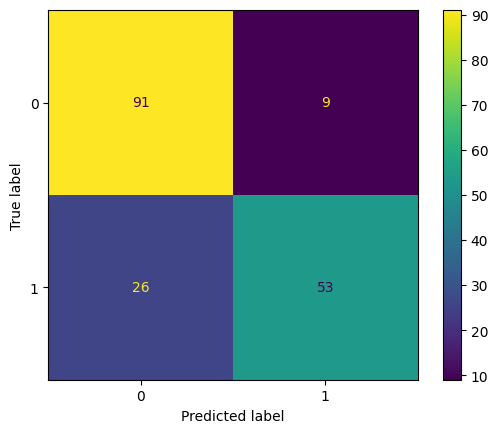

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()


### Perform Classification report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.85      0.67      0.75        79

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



### Use modek prediction

In [51]:
xnew= pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
xnew_pre= pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [54]:
xnew_pre= pd.DataFrame(xnew_pre, columns=cols)
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Use the model for prediction

In [55]:
pred= best_gbc.predict(xnew_pre)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###  Saving to dataframe

In [57]:
df_pred= xnew[['PassengerId']]
df_pred

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [58]:
df_pred['Survived_pred']= pred
df_pred

,PassengerId,Survived_pred
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
df_pred['Survived_pred'].value_counts()

Survived_pred
0    281
1    137
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

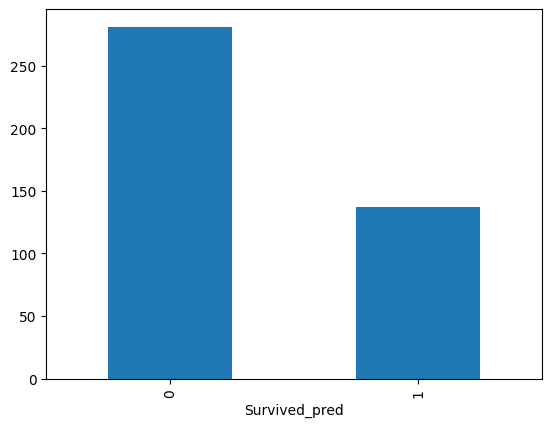

In [62]:
df_pred['Survived_pred'].value_counts().plot(kind='bar')

### Save predictions to csv

In [63]:
df_pred.to_csv('Predictions.csv',index=False)